                   ARIMA MODEL FOR BUDGET FORCASTING

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error


In [263]:
# Load dataset
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\student_expense_data_final.csv", parse_dates=["Date"])
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set 'date' as the index
df.set_index('Date', inplace=True)

# Aggregate the data by month (summing up the 'amount' column)
monthly_data = df['Amount'].resample('M').sum()
monthly_data.head()

Date
2024-03-31    3512.09
2024-04-30    2819.53
2024-05-31    3302.70
2024-06-30    2949.10
2024-07-31    2475.63
Freq: ME, Name: Amount, dtype: float64

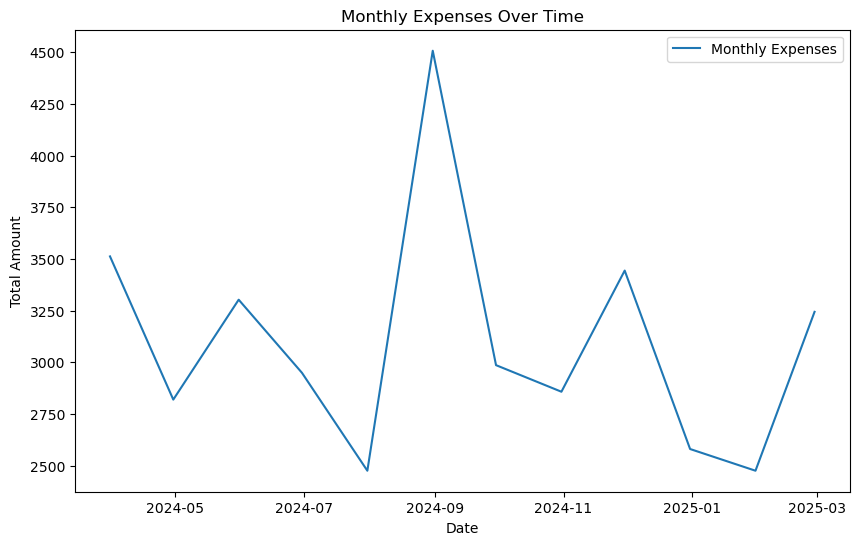

In [265]:
import matplotlib.pyplot as plt

# Plot the monthly expenses
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Monthly Expenses')
plt.title('Monthly Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

In [267]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    """
    Check if a time series is stationary using the ADF test.
    """
    result = adfuller(series)
    p_value = result[1]
    if p_value > 0.05:
        print("The time series is NOT stationary.")
        return False
    else:
        print("The time series is stationary.")
        return True

def make_stationary(series):
    """
    Make the time series stationary by differencing.
    """
    diff_series = series.diff().dropna()
    return diff_series

In [269]:
# Check if the data is stationary
is_stationary = check_stationarity(monthly_data)

# Apply differencing only if the data is not stationary
if not is_stationary:
    print("Applying differencing to make the data stationary...")
    monthly_data = make_stationary(monthly_data)
else:
    print("No differencing needed. Data is already stationary.")

The time series is stationary.
No differencing needed. Data is already stationary.


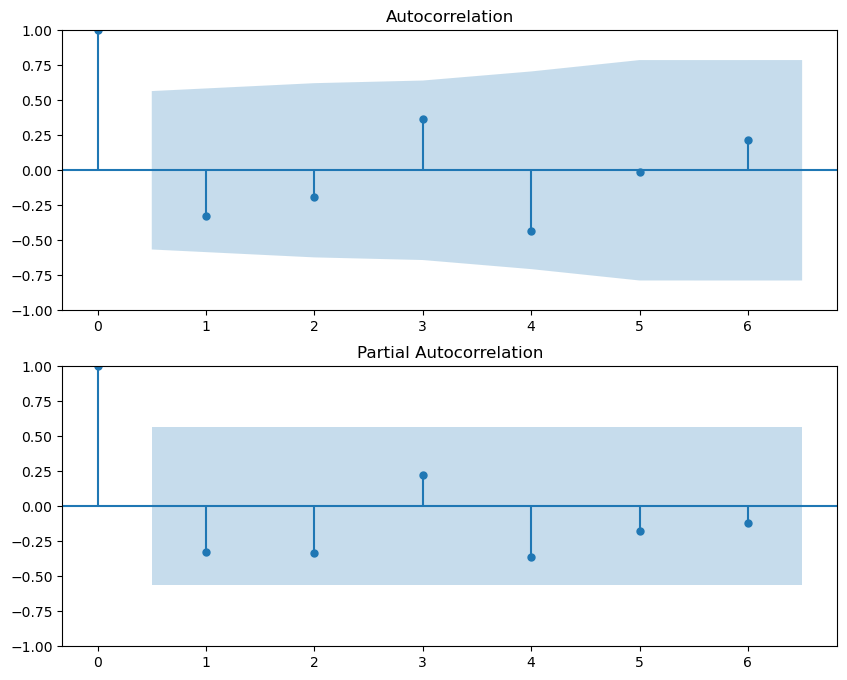

In [271]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Check the length of the data
n_lags = min(6, len(monthly_data) - 1 ) # Ensure lags < length of data

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(monthly_data, lags=n_lags, ax=ax1)
plot_pacf(monthly_data, lags=n_lags, ax=ax2)
plt.show()

In [273]:
# Fit ARIMA model
model = ARIMA(monthly_data, order=(p, d, q))  # Replace p, d, q with your values
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   12
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -90.135
Date:                Fri, 21 Mar 2025   AIC                            190.270
Time:                        21:46:28   BIC                            192.694
Sample:                    03-31-2024   HQIC                           189.372
                         - 02-28-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3112.1625     86.743     35.878      0.000    2942.149    3282.176
ar.L1         -0.5191      0.865     -0.600      0.548      -2.215       1.176
ma.L1          0.0039     29.640      0.000      1.0

In [275]:
print(df.columns)


Index(['Description', 'Amount', 'Category'], dtype='object')


In [277]:
# Forecast the next 12 months
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Values:")
print(forecast)

Forecasted Values:
2025-03-31    3597.369391
2025-04-30    3048.522665
2025-05-31    3145.196578
Freq: ME, Name: predicted_mean, dtype: float64


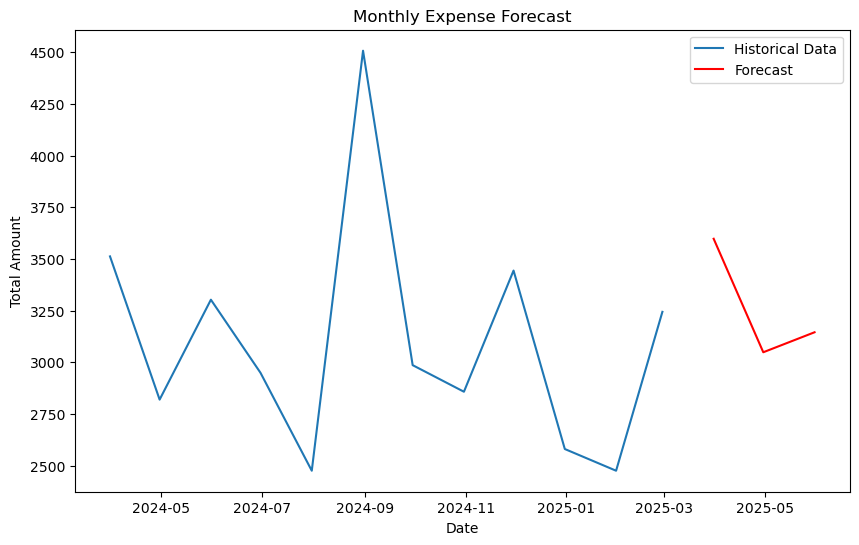

In [279]:


# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Historical Data')

# Plot forecasted values
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# Add labels and legend
plt.title('Monthly Expense Forecast')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()